In [18]:
import pandas as pd
import numpy as np

import tensorflow

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
df=pd.read_csv("Language Detection.csv")
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [3]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
df.shape

(10337, 2)

In [51]:
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

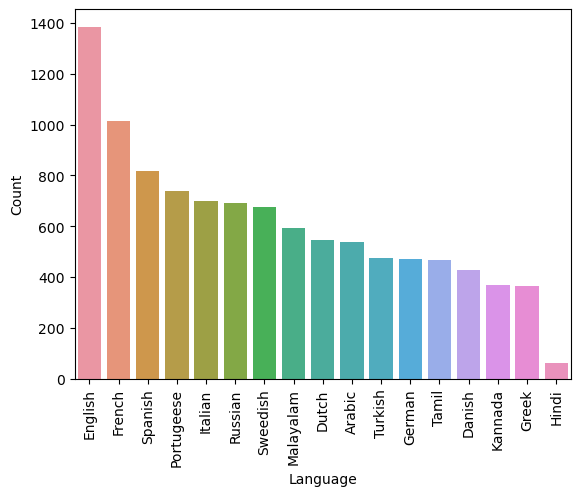

In [12]:
language_counts = df['Language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Create the bar plot
sns.barplot(x='Language', y='Count', data=language_counts)
plt.xticks(rotation=90)
plt.show()

In [16]:
df[df['Language']=='French']

,Text,Language
3250,Si vous disposez d'ouvrages ou d'articles de r...,French
3251,Comment ajouter mes sources ?,French
3252,Cette page ou section est en train d'être trad...,French
3253,Vous pouvez aider au développement de Wikipédi...,French
3254,Le mot nature est un terme polysémique (c’est-...,French
...,...,...
4259,"quelle a été votre erreur, nous allons vous no...",French
4260,"narcisa a changé ses manières, elle a lutté au...",French
4261,Comment' Le narcissisme de s maintenant marian...,French
4262,a-t-elle je suppose qu'elle ne voudrait plus d...,French


In [15]:
df['Text'][1]

'"Nature" can refer to the phenomena of the physical world, and also to life in general.'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [20]:
x=np.array(df['Text'])
y=np.array(df['Language'])

cv=CountVectorizer()
X=cv.fit_transform(x)

<10337x39928 sparse matrix of type '<class 'numpy.int64'>'
	with 163190 stored elements in Compressed Sparse Row format>

In [24]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [26]:
model.score(X_test,y_test)

0.9790457769181173

In [29]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score

In [28]:
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       165
      Danish       0.98      0.95      0.97       123
       Dutch       0.99      0.97      0.98       175
     English       0.90      1.00      0.95       435
      French       0.98      0.99      0.99       309
      German       1.00      0.97      0.98       135
       Greek       1.00      0.98      0.99       102
       Hindi       1.00      1.00      1.00        20
     Italian       0.99      0.99      0.99       217
     Kannada       1.00      0.99      1.00       101
   Malayalam       1.00      0.98      0.99       184
  Portugeese       0.99      0.98      0.98       205
     Russian       1.00      0.98      0.99       200
     Spanish       0.99      0.98      0.98       246
    Sweedish       0.98      0.97      0.98       193
       Tamil       1.00      0.98      0.99       145
     Turkish       1.00      0.93      0.96       147

    accuracy              

In [34]:
f1_score(y_test,y_pred,average='weighted')

0.9792597716708292

In [37]:
recall_score(y_test,y_pred,average='weighted')

0.9790457769181173

In [38]:
precision_score(y_test,y_pred,average='weighted')

0.9804045883945326

In [39]:
accuracy_score(y_test,y_pred)

0.9790457769181173

In [47]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: nāṉ uṉṉai kātalikkiṟēṉ
['English']


In [48]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: நான் உன்னை காதலிக்கிறேன்
['Tamil']


In [49]:
X.shape

(10337, 39928)

In [53]:
joblib.dump(model,"language_detection.pkl")
joblib.dump(cv,"count_vector.pkl")

NameError: name 'joblib' is not defined